# <center> Neural Networks and Deep Learning (CSCI 5922)</center>
# <center> Spring 2019 </center>

**Name:** Poorwa Hirve


## Goal

The goal of this assignment is to introduce neural networks in terms of ideas you are already familiar with:  linear regression and linear-threshold classification

## Dataset

You are given a dataset with 2 input variables ($x_1$, $x_2$) and an output variable ($y$).

In [1]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
import os

# Load data
data = np.loadtxt(os.path.join('data', 'assign1_data.txt'))
X = data[:,:2]
X = np.hstack((X, np.ones((len(X),1)))) # adding the bias
y = data[:, 2]
z = data[:, 3]
error_list = []
incorrect_list = []

## Part 1

Write a program to find the least squares solution to $y = w_1 x_1 + w_2 x_2 + b$ for the above dataset. 

Complete the following function below and use it to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given function.

In [2]:
def lms(X, y):
    """
    Finds the Least Mean Squares solution
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of output value 'y' (size : no of examples X 1)
    
    Returns
    -------
    w : solution array
    """
    X_t = X
    
    return (np.linalg.inv(X.T@X)@X.T)@y

(A) Report the values of $w_1$, $w_2$, and $b$.

In [3]:
w = lms(X,y)
print ("w1 =", w[0])
print ("w2 =", w[1])
print ("b =", w[2])

w1 = -2.044242595137635
w2 = 3.996860168659326
b = -0.9242908118675917


(B) What function or method did you use to find the least-squares solution?

- I obtained the least-squares solution using the normal equation which is $ O(n^3) $:
$$ \textbf{w} = (X \cdot X^T)^{-1} X^T \cdot y $$


## Part 2

Using the LMS algorithm, write a program that determines the coefficients {w1,w2,b} via incremental updating, steepest descent, and multiple passes through the training data. You will need to experiment with updating rules (online, batch, minibatch), step sizes (i.e., learning rates), stopping criteria, etc. Experiment to find settings that lead to solutions with the fewest number of sweeps through the data.

Complete the following functions below and use them to answer questions (A), (B) and (C). You may find the shuffle function from scikit-learn useful. 

Use the following hyperparameters:

Learning rates = [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]

MaxIter = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]

**Note:** Please do not change the interface of the given functions.

In [4]:
from sklearn.utils import shuffle

def calcError(X, y, w):
    """
    Returns Mean Squared Error
    """
    return ((np.dot(X, w) - y)**2).sum() / (2*len(y))

def online_update(X, y, w, alpha): # Added alpha parameter
    """
    One iteration of the online update over the entire dataset (one sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    """
    error = 0
    
    for i in range(len(y)):
        w = w - alpha * (w.dot(X[i]) - y[i]) * X[i]
        error += calcError(X, y, w)
    
    error /= len(y)
    
    return w, error
    # returning error along with weights

def batch_update(X, y, w, alpha): # Added alpha parameter
    """
    One iteration of the batch update.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    """
    w = w - alpha * (1.0 / len(y)) * np.dot(X.T, np.dot(X, w) - y)
    
    return w, calcError(X, y, w)
    # returning error along with weights

def mini_batch_update(X, y, w, alpha, batch_size): # Added alpha and batch_size parameters
    """
    One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    batch_size : size of the batch for gradient update
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    """
    batch_error = 0
    for i in range(0, len(y), batch_size):
        if i+batch_size < len(y):
            w, error = batch_update(X[i:i+batch_size], y[i:i+batch_size], w, alpha)
        else:
            w, error = batch_update(X[i:], y[i:], w, alpha)
        batch_error += error
    return w, batch_error / (len(y) / batch_size)
    # returning error along with weights

def lms_grad_desc(X, y, maxIter, alpha, update, *batch_size):
    """
    Implements the LMS with gradient descent.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    maxIter : Maximum number of iterations allowed
    alpha : Learning rate
    update : update function to utilize (one of online, batch, mini-batch)
    batch_size : number of examples in a batch (only useful when update = mini_batch_update)
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    
    Note : *batch_size is an optional argument and only to be used when doing mini-batch Gradient Descent 
    """
    w = np.zeros_like(X[0])
    for i in range(maxIter):
        X, y = shuffle(X, y)
        if update == 'online':
            w, error = online_update(X, y, w, alpha)
        elif update == 'batch':
            w, error = batch_update(X, y, w, alpha)
        elif update == 'mini-batch':
            w, error = mini_batch_update(X, y, w, alpha, batch_size[0])
            
        error_list.append(error) # global list
        
        if i > 1 and abs(error_list[-1]-error_list[-2])/error_list[-2] < 0.001:
            break
            
    return w

(A) Report the values of $w_1$, $w_2$, and $b$. 

In [5]:
w = lms_grad_desc(X, y, 100, 0.1, 'online')
print ("w1 =", w[0])
print ("w2 =", w[1])
print ("b =", w[2])

w1 = -2.0350446047192117
w2 = 3.9963137951661625
b = -0.9123255116552781


In [6]:
w = lms_grad_desc(X, y, 100, 0.1, 'batch')
print ("w1 =", w[0])
print ("w2 =", w[1])
print ("b =", w[2])

w1 = -1.0373658329924011
w2 = 1.9435381868192205
b = -0.3580234852981285


In [7]:
w = lms_grad_desc(X, y, 100, 0.1, 'mini-batch', 10)
print ("w1 =", w[0])
print ("w2 =", w[1])
print ("b =", w[2])

w1 = -1.9861571710238588
w2 = 3.840363201594782
b = -0.8638881344759095


In [8]:
maxIters = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]
alpha = [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]
online_errors = []
batch_errors = []
mini_batch_errors = []
error_list = []
batches = [5, 10, 20, 25, 50]

print ("ONLINE")
for i in range(len(alpha)):
    for maxIter in maxIters:
        w = lms_grad_desc(X, y, maxIter, alpha[i], 'online')
        online_errors.append(error_list)
        print ("alpha =", alpha[i], "maxIter =", maxIter,", No. of epochs =", len(error_list),", Error =", error_list[-1])
        error_list = []
    print ()
    
print ("\nBATCH")
for i in range(len(alpha)):
    for maxIter in maxIters:
        w =lms_grad_desc(X, y, maxIter, alpha[i], 'batch')
        batch_errors.append(error_list)
        print ("alpha =", alpha[i], "maxIter =", maxIter,", No. of epochs =", len(error_list),", Error =", error_list[-1])
        error_list = []
    print ()
    
print ("\nMINI-BATCH")
for i in range(len(alpha)):
    for maxIter in maxIters:
        for batch_size in batches:
            lms_grad_desc(X, y, maxIter, alpha[i], 'mini-batch', batch_size)
            mini_batch_errors.append(error_list)
            print ("alpha =", alpha[i], "maxIter =", maxIter,", Batch size =", batch_size,", No. of epochs =", len(error_list),", Error =", error_list[-1])
            error_list = []
        print ()
    print ()

ONLINE
alpha = 0.001 maxIter = 10 , No. of epochs = 10 , Error = 0.6346838892948637
alpha = 0.001 maxIter = 50 , No. of epochs = 50 , Error = 0.3803953769010201
alpha = 0.001 maxIter = 100 , No. of epochs = 100 , Error = 0.20514521631347218
alpha = 0.001 maxIter = 500 , No. of epochs = 441 , Error = 0.02176656900227115
alpha = 0.001 maxIter = 1000 , No. of epochs = 438 , Error = 0.02185065915425529
alpha = 0.001 maxIter = 5000 , No. of epochs = 452 , Error = 0.02148600598404869
alpha = 0.001 maxIter = 10000 , No. of epochs = 443 , Error = 0.021717851128771448
alpha = 0.001 maxIter = 25000 , No. of epochs = 439 , Error = 0.021823950083127458
alpha = 0.001 maxIter = 50000 , No. of epochs = 442 , Error = 0.02174147840662846

alpha = 0.05 maxIter = 10 , No. of epochs = 10 , Error = 0.02100690020401419
alpha = 0.05 maxIter = 50 , No. of epochs = 25 , Error = 0.019974231718153965
alpha = 0.05 maxIter = 100 , No. of epochs = 14 , Error = 0.02024789782584603
alpha = 0.05 maxIter = 500 , No. of

alpha = 0.001 maxIter = 100 , Batch size = 5 , No. of epochs = 100 , Error = 0.5544535463196045
alpha = 0.001 maxIter = 100 , Batch size = 10 , No. of epochs = 100 , Error = 0.6308338526967309
alpha = 0.001 maxIter = 100 , Batch size = 20 , No. of epochs = 3 , Error = 0.7246547640896712
alpha = 0.001 maxIter = 100 , Batch size = 25 , No. of epochs = 3 , Error = 0.7250038696353615
alpha = 0.001 maxIter = 100 , Batch size = 50 , No. of epochs = 3 , Error = 0.7256158839668715

alpha = 0.001 maxIter = 500 , Batch size = 5 , No. of epochs = 500 , Error = 0.20430364335003848
alpha = 0.001 maxIter = 500 , Batch size = 10 , No. of epochs = 500 , Error = 0.37823974488492573
alpha = 0.001 maxIter = 500 , Batch size = 20 , No. of epochs = 3 , Error = 0.7247119192460106
alpha = 0.001 maxIter = 500 , Batch size = 25 , No. of epochs = 3 , Error = 0.7249957695115137
alpha = 0.001 maxIter = 500 , Batch size = 50 , No. of epochs = 3 , Error = 0.7256035331385631

alpha = 0.001 maxIter = 1000 , Batch siz

alpha = 0.01 maxIter = 100 , Batch size = 5 , No. of epochs = 100 , Error = 0.06889591420015309
alpha = 0.01 maxIter = 100 , Batch size = 10 , No. of epochs = 100 , Error = 0.2048948793401612
alpha = 0.01 maxIter = 100 , Batch size = 20 , No. of epochs = 100 , Error = 0.37835624415951163
alpha = 0.01 maxIter = 100 , Batch size = 25 , No. of epochs = 100 , Error = 0.42971233022641675
alpha = 0.01 maxIter = 100 , Batch size = 50 , No. of epochs = 100 , Error = 0.5542161554745173

alpha = 0.01 maxIter = 500 , Batch size = 5 , No. of epochs = 216 , Error = 0.021985327205897597
alpha = 0.01 maxIter = 500 , Batch size = 10 , No. of epochs = 379 , Error = 0.024303915045570217
alpha = 0.01 maxIter = 500 , Batch size = 20 , No. of epochs = 500 , Error = 0.04503343139589584
alpha = 0.01 maxIter = 500 , Batch size = 25 , No. of epochs = 500 , Error = 0.06875497915488361
alpha = 0.01 maxIter = 500 , Batch size = 50 , No. of epochs = 365 , Error = 0.28375392610870986

alpha = 0.01 maxIter = 1000 , 

alpha = 0.1 maxIter = 100 , Batch size = 10 , No. of epochs = 55 , Error = 0.019802763512084785
alpha = 0.1 maxIter = 100 , Batch size = 20 , No. of epochs = 100 , Error = 0.020529000754706317
alpha = 0.1 maxIter = 100 , Batch size = 25 , No. of epochs = 99 , Error = 0.0233510160080996
alpha = 0.1 maxIter = 100 , Batch size = 50 , No. of epochs = 100 , Error = 0.06852536977791246

alpha = 0.1 maxIter = 500 , Batch size = 5 , No. of epochs = 28 , Error = 0.01965718589100091
alpha = 0.1 maxIter = 500 , Batch size = 10 , No. of epochs = 41 , Error = 0.022529790992885417
alpha = 0.1 maxIter = 500 , Batch size = 20 , No. of epochs = 81 , Error = 0.02292656300273878
alpha = 0.1 maxIter = 500 , Batch size = 25 , No. of epochs = 110 , Error = 0.021496807775530667
alpha = 0.1 maxIter = 500 , Batch size = 50 , No. of epochs = 205 , Error = 0.02273596877816518

alpha = 0.1 maxIter = 1000 , Batch size = 5 , No. of epochs = 76 , Error = 0.01892856016408313
alpha = 0.1 maxIter = 1000 , Batch size = 

(B) What settings worked well for you:  online vs. batch vs. minibatch? What step size? How did you decide to terminate?

The following settings worked well for each type of update:

1. __Minibatch update__
    - step size = $0.3$ (alpha)
    - batch size = $10$
    - error = ~$0.019$
    - number of epochs = ~$55$ (maxIter = $50000$)


2. __Online update__
    - step size = $0.1$ (alpha)
    - error = ~$0.021$
    - number of epochs = ~$31$ (maxIter = $50000$)


3. __Batch update__
    - step size = $0.3$ (alpha)
    - error = ~$0.020$
    - number of epochs = ~$182$ (maxIter = $50000$)


> I decided to terminate using the criteria that absolute change in the error should be less than $0.1\%$

> According to the graph data in __(C)__ we can see that:
- __Online Update__ converges fastest, __Batch Update__ converges slowest.
- __Minibatch Update__ gives the least error, __Online Update__ gives the most.

(C) Make a graph of error on the entire data set as a function of epoch. An epoch is a complete sweep through all the data.

maxIter = 50000, no. of epochs = 32 , error = 0.019116277461635814


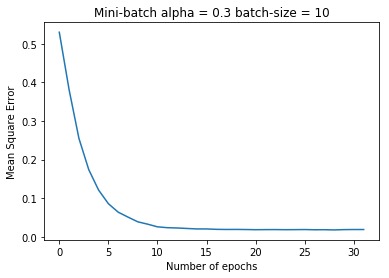

maxIter = 50000, no. of epochs = 23 , error = 0.02109657549550453


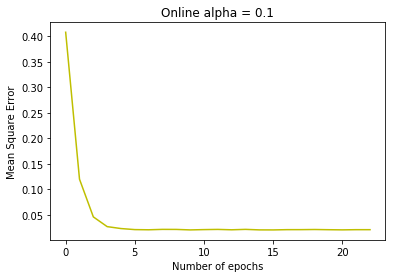

maxIter = 50000, no. of epochs = 182 , error = 0.02018981383229961


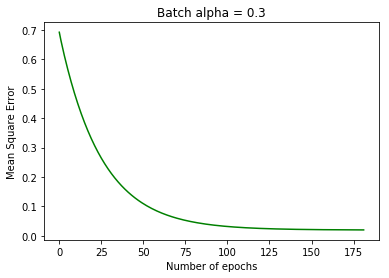

In [9]:
# MINI-BATCH

error_list = []
maxIter = 50000
alpha = 0.3
lms_grad_desc(X, y, maxIter, alpha, 'mini-batch', 10)
print ("maxIter = 50000, no. of epochs =", len(error_list), ", error =", error_list[-1])

plt.plot([i for i in range(len(error_list))], error_list)
plt.title('Mini-batch alpha = 0.3 batch-size = 10')
plt.xlabel('Number of epochs')
plt.ylabel('Mean Square Error')
plt.show()


# ONLINE

error_list = []
maxIter = 50000
alpha = 0.1
lms_grad_desc(X, y, maxIter, alpha, 'online')
print ("maxIter = 50000, no. of epochs =", len(error_list), ", error =", error_list[-1])

plt.plot([i for i in range(len(error_list))], error_list, 'y')
plt.title('Online alpha = 0.1')
plt.xlabel('Number of epochs')
plt.ylabel('Mean Square Error')
plt.show()


# BATCH

error_list = []
maxIter = 50000
alpha = 0.3
lms_grad_desc(X, y, maxIter, alpha, 'batch')
print ("maxIter = 50000, no. of epochs =", len(error_list), ", error =", error_list[-1])

plt.plot([i for i in range(len(error_list))], error_list, 'g')
plt.title('Batch alpha = 0.3')
plt.xlabel('Number of epochs')
plt.ylabel('Mean Square Error')
plt.show()

## Part 3

The data set from a regression problem can be converted into a classification problem simply by using the sign of (+ or -) as representing one of two classes. In the data set used in Part 1 and 2, you'll see a variable that represents this binary (0 or 1) class.

Use the perceptron learning rule to solve for the coefficients {$w_1$, $w_2$, $b$} of this classification problem.   

Two warnings: First, your solution to Part 3 should require only a few lines of code changed from the code you wrote for Part 2. Second, the Perceptron algorithm will not converge if there is no exact solution to the training data. It will jitter among coefficients that all yield roughly equally good solutions.

Complete the following functions below and use them to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given functions.

> __NOTE:__  
Stopping criteria for perceptron is for epochs greater than $100$, the absolute change in the number of incorrect examples should be less than $0.1\%$ (similar to LMS)

In [10]:
def step(Xw):
    """
    Returns 1 if the dot product of weight and features is > 0 else returns 0
    """
    if Xw > 0:
        return 1
    return 0

def perceptron_update(X, y, w):
    """
    One iteration of the Perceptron update over the entire dataset (not just a single point).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    incorrect : Incorrectly classified examples
    """
    incorrect = 0
    
    for i in range(len(y)):
        y_hat = step(w.dot(X[i]))
        w = w + alpha*(y[i] - y_hat) * X[i]
        if y_hat != y[i]:
            incorrect += 1
    
    return w, incorrect

def perceptron(X, y, maxIter, alpha):
    """
    Implements the Perceptron algorithm.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    maxIter : The maximum number of iterations allowed 
    alpha : Learning Rate
    
    Returns
    -------
    w : Coefficients of the classifier
    incorrect : Incorrectly classified examples on termination
    """
    w = np.zeros_like(X[0])
    for i in range(maxIter):
        X, y = shuffle(X, y)
        w, incorrect = perceptron_update(X, y, w) 
        incorrect_list.append(incorrect)
        if i > 100 and incorrect_list[-2] > 0 and abs(incorrect_list[-1] - incorrect_list[-2]) / incorrect_list[-2] <= 0.001:
            break
            
    return w, incorrect

(A) Report the values of coefficients $w_1$, $w_2$, and $b$.

In [11]:
incorrect_list = []
w, incorrect = perceptron(X, z, 1000, 0.01)
print ("w1 =", w[0])
print ("w2 =", w[1])
print ("b =", w[2])
print ("Incorrect examples:", incorrect)

w1 = -2.8784099999999917
w2 = 5.190780000000021
b = -0.5999999999999999
Incorrect examples: 5


(B) Make a graph of the accuracy (% correct classification) on the training set as a function of epoch.

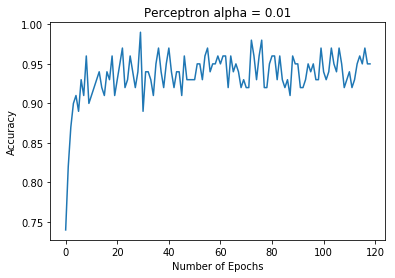

In [12]:
accuracy = 1.0 - (np.array(incorrect_list) / len(z))

plt.title("Perceptron alpha = 0.01")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.plot([i for i in range(len(incorrect_list))], accuracy)
plt.show()

## Part 4

In machine learning, we really want to train a model based on some data and then expect the model to do well on "out of sample" data. Try this with the code you wrote for Part 3:  Train the model on the first {5, 10, 25, 50, 75} examples in the data set and test the model on the final 25 examples.

Complete the following function below and use it to answer (A). 

**Note:** Please do not change the interface of the given function.

In [13]:
def classify(X, y, w):
    """
    Use this function to classify examples in the test set
    
    Parameters
    ----------
    X : Test set features
    y : Test set labels
    w : Perceptron coefficients
    
    Returns
    -------
    correct : number of correctly classified examples
    """
    correct = 0
    for i in range(len(y)):
        y_hat = step(w.dot(X[i]))
        if y_hat == y[i]:
            correct += 1
    
    return correct

How does performance on the test set vary with the amount of training data? Make a bar graph showing performance for each of the different training set sizes.

[0.84, 0.96, 0.96, 0.96, 0.92]


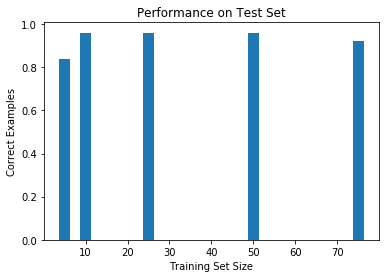

In [19]:
train_sets = [5, 10, 25, 50, 75]
correct_list = []
X_test = X[-25:]
z_test = z[-25:]
for train_set in train_sets:
    X_train = X[:train_set]
    z_train = z[:train_set]
    w, incorrect = perceptron(X_train, z_train, 1000, 0.001)
    correct = classify(X_test, z_test, w)
    correct_list.append(float(correct) / float(len(z_test)))
print (correct_list)
plt.bar(train_sets, correct_list, width=2.5)
plt.xlabel("Training Set Size")
plt.ylabel("Correct Examples")
plt.title("Performance on Test Set")

plt.show()

- As seen from the graph, the performance (accuracy) increases till 50 examples then decreases, but still remains above 90%